**Author:** Maciej Tarsa <br>
**Date:** 30 December 2020

# Medical Data Visualiser

This is the implementation of the project from Data Analysis with Python course at freeCodeCamp.org

### Assignment

In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

**Data description**

The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

File name: medical_examination.csv

**Tasks**

Create a chart similar to `examples/Figure_1.png`, where we show the counts of good and bad outcomes for the `cholesterol`, `gluc`, `alco`, `active`, and `smoke` variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks in `medical_data_visualizer.py`:

- Add an `overweight` column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
- Normalize the data by making 0 always good and 1 always bad. If the value of `cholesterol` or `gluc` is 1, make the value 0. If the value is more than 1, make the value 1.
- Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's `catplot()`. The dataset should be split by 'Cardio' so there is one chart for each `cardio` value. The chart should look like `examples/Figure_1.png`.
- Clean the data. Filter out the following patient segments that represent incorrect data:
    - diastolic pressure is higher than systolic (Keep the correct data with `df['ap_lo'] <= df['ap_hi'])`)
    - height is less than the 2.5th percentile (Keep the correct data with `(df['height'] >= df['height'].quantile(0.025))`)
    - height is more than the 97.5th percentile
    - weight is less than the 2.5th percentile
    - weight is more than the 97.5th percentile
- Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's `heatmap()`. Mask the upper triangle. The chart should look like `examples/Figure_2.png`.
Any time a variable is set to `None`, make sure to set it to the correct code.

#### Figure 1
![Figure1](img/Figure_1.png)

#### Figure 2
![Figure2](img/Figure_2.png)

### Solution

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column
df['overweight'] = np.where(((df['weight']/(df['height']/100)**2) > 25), 1, 0)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, 1)
df['gluc'] = np.where(df['gluc'] == 1, 0, 1)

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df,id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.
    df_cat = pd.DataFrame(df_cat.groupby(['cardio', 'variable','value'])['value'].count()).rename(columns={
                            'value': 'total'}).reset_index()
    
    # Draw the catplot with 'sns.catplot()'
    g = sns.catplot(x='variable',y='total',hue='value',col='cardio',data=df_cat,kind='bar')
    fig = g.fig

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) 
                 & (df['height'] >= df['height'].quantile(0.025))
                 & (df['height'] <= df['height'].quantile(0.975))
                 & (df['weight'] >= df['weight'].quantile(0.025))
                 & (df['weight'] <= df['weight'].quantile(0.975))]
    
    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12,12))

    # Draw the heatmap with 'sns.heatmap()'

    ax = sns.heatmap(corr, mask=mask, annot=True, linewidths=.5, fmt='.1f', 
                     square=True, center=0, vmin=-0.1, vmax=0.25, 
                     cbar_kws={'shrink': .45, 'format':'%.2f'})

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


### Test the solution

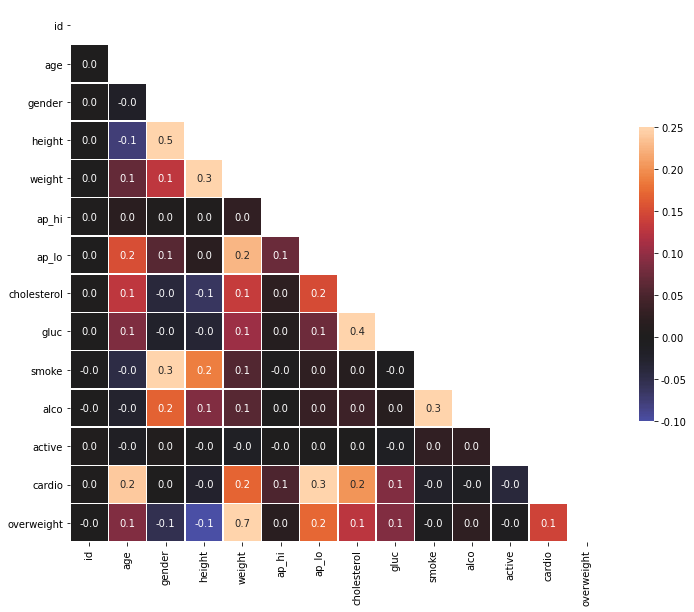

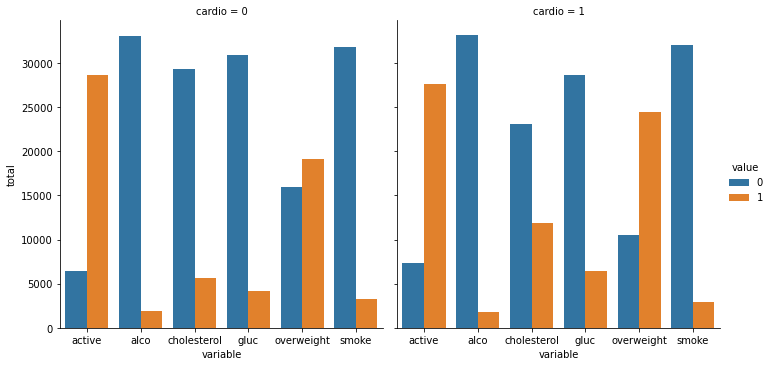

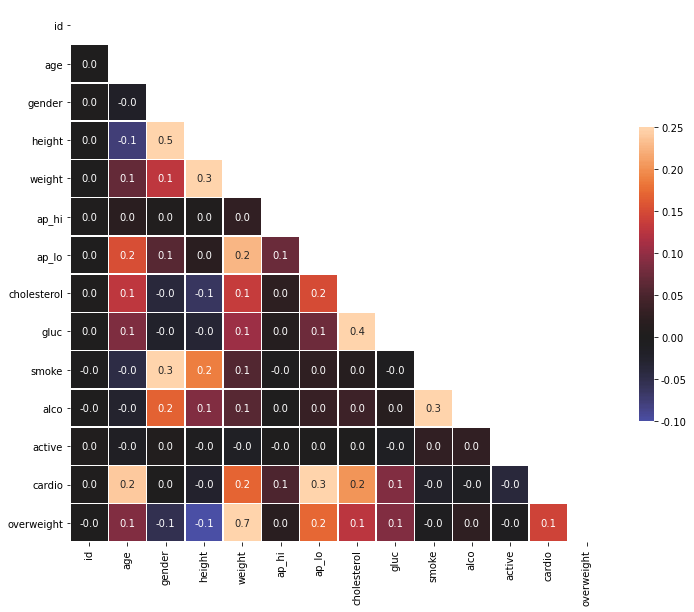

In [3]:
draw_cat_plot()
draw_heat_map()

## Code elaboration

In this section, I include the code I used to arrive at the solutions to each section

In [4]:
# read the data into a dataframe
df = pd.read_csv('medical_examination.csv')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


##### Overweight column

In [5]:
# I am going to use np.where to have an if else statement in one line
BMI = np.where(((df['weight']/(df['height']/100)**2) > 25), 1, 0)
BMI

array([0, 1, 0, ..., 1, 1, 0])

In [6]:
df['overweight'] = np.where(((df['weight']/(df['height']/100)**2) > 25), 1, 0)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


##### Normalise the data so that 1 is always bad and 0 is always good

This will apply to the values of `cholesterol` and `gluc`

In [7]:
# again, I will apply np.where so that if it is the value of 1 (good),
# it will turn it to 0, otherwise it will make it 1
df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, 1)
df['gluc'] = np.where(df['gluc'] == 1, 0, 1)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


##### Reshape the data

In [8]:
# documentation for pd.melt
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html
df_cat = pd.melt(df,id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


In [9]:
# grouping and reformatting the data
df_cat = pd.DataFrame(df_cat.groupby(['cardio', 'variable','value'])['value'].count()).rename(columns={
                            'value': 'total'}).reset_index()
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


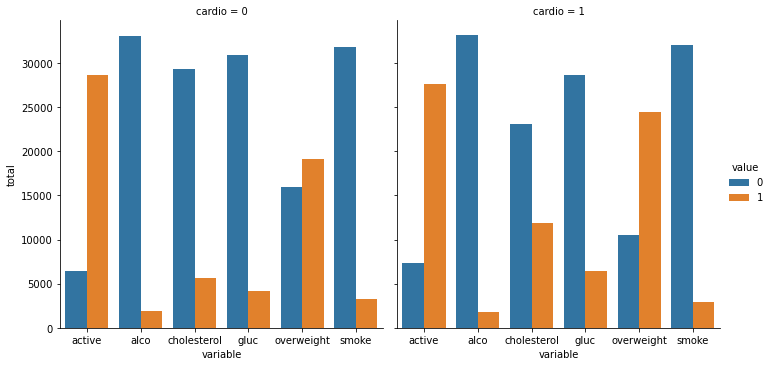

In [10]:
# drawing the catplot
g = sns.catplot(x='variable',y='total',hue='value',col='cardio',data=df_cat,kind='bar')

##### Clean the data

Filter out the patient segments that represent incorrect data

In [11]:
# the whole dataset contains 7000 records
len(df)

70000

In [12]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [13]:
# of which 68766 have the correct values for blood pressure
len(df[df['ap_lo'] <= df['ap_hi']])

68766

In [14]:
# I will only keep those
df = df.drop(df[df['ap_lo'] > df['ap_hi']].index)

In [15]:
# now the length of the dataset should be 68766
len(df)

68766

In [16]:
# next, height should be less than the 2.5th percentile
# let's check how many have the correct value for height
len(df[df['height'] >= df['height'].quantile(0.025)])

67260

In [17]:
# 67260 values are correct
# let's amend the dataframe
df = df.drop(df[(df['height'] < df['height'].quantile(0.025))].index)

In [18]:
# I should have 67260 values left
len(df)

67260

In [19]:
# next, height needs to be more than 97.5th percentile
len(df[df['height'] < df['height'].quantile(0.975)])

65000

In [20]:
# 6500 values here
# let's amend the dataframe
df = df.drop(df[(df['height'] >= df['height'].quantile(0.975))].index)
len(df)

65000

In [21]:
# next, weight is less than 2.5th percentile
len(df[df['weight'] >= df['weight'].quantile(0.025)])

63526

In [22]:
# amend the dataframe
df = df.drop(df[(df['weight'] < df['weight'].quantile(0.025))].index)
len(df)

63526

In [23]:
# finally weight is more than the 97.5th percentile
len(df[df['weight'] < df['weight'].quantile(0.975)])

61856

In [24]:
# amend the dataframe
df = df.drop(df[(df['weight'] >= df['weight'].quantile(0.975))].index)
len(df)

61856

In [25]:
70000-61856

8144

In the end, I am left with 61856 records. I filtered out 8144 incorrect records

In [30]:
# to put it all in one bit of code:
df_heat = df.drop(df[df['ap_lo'] > df['ap_hi']].index)
df_heat = df_heat.drop(df_heat[(df_heat['height'] < df_heat['height'].quantile(0.025))].index)
df_heat = df_heat.drop(df_heat[(df_heat['height'] > df_heat['height'].quantile(0.975))].index)
df_heat = df_heat.drop(df_heat[(df_heat['weight'] < df_heat['weight'].quantile(0.025))].index)
df_heat = df_heat.drop(df_heat[(df_heat['weight'] > df_heat['weight'].quantile(0.975))].index)

In [31]:
# check the lnegth is correct
len(df_heat)

56638

In [28]:
# Alternatively, this can be done as
df_heat = df[(df['ap_lo'] <= df['ap_hi']) 
             & (df['height'] >= df['height'].quantile(0.025))
             & (df['height'] <= df['height'].quantile(0.975))
             & (df['weight'] >= df['weight'].quantile(0.025))
             & (df['weight'] <= df['weight'].quantile(0.975))]

In [29]:
# length should still be the same
len(df_heat)

56638

##### Heatmap

In [32]:
# create a correlation matrix
corr = df_heat.corr()
print(corr)

                   id       age    gender    height    weight     ap_hi  \
id           1.000000  0.003931  0.004559  0.001256  0.000653  0.001565   
age          0.003931  1.000000 -0.011764 -0.074278  0.073126  0.018398   
gender       0.004559 -0.011764  1.000000  0.478073  0.099143  0.004246   
height       0.001256 -0.074278  0.478073  1.000000  0.195370  0.002106   
weight       0.000653  0.073126  0.099143  0.195370  1.000000  0.022498   
ap_hi        0.001565  0.018398  0.004246  0.002106  0.022498  1.000000   
ap_lo        0.000149  0.150888  0.056765  0.004054  0.207976  0.075461   
cholesterol  0.004199  0.127655 -0.038989 -0.068893  0.131848  0.026066   
gluc         0.002069  0.088007 -0.024691 -0.038008  0.099456  0.012866   
smoke       -0.001745 -0.040608  0.335637  0.176807  0.049787 -0.001663   
alco        -0.002695 -0.025268  0.167550  0.079753  0.052865  0.000898   
active       0.005223 -0.010569  0.009206  0.004052 -0.003928  0.002015   
cardio       0.003926  0.

In [33]:
# create a mask to only display the lower triangle
# code from https://cmdlinetips.com/2020/02/lower-triangle-correlation-heatmap-python/
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

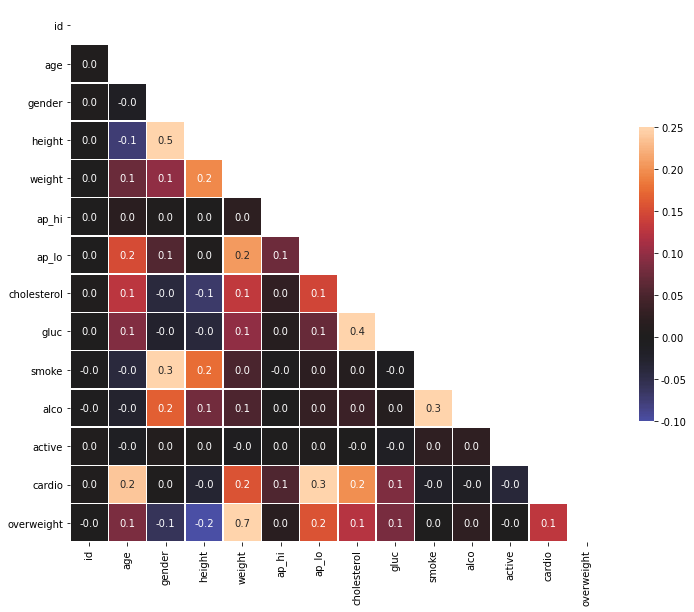

In [34]:
# now draw the figure with sns.heatmap
fig, ax = plt.subplots(figsize=(12, 12))
# arguments amended to make it resemble the example provided by the question
ax = sns.heatmap(corr, mask=mask, annot=True, linewidths=.5, fmt='.1f', square=True, center=0, vmin=-0.1, vmax=0.25, cbar_kws={'shrink': .45, 'format':'%.2f'})